In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
# This dataset acquired from:
# https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download
spotidata = pd.read_csv('kaggle_spotify_dataset.csv')

In [3]:
spotidata.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
# Columns that we care about:
relevant = ['valence','energy','danceability','acousticness','tempo','speechiness','mode']


In [5]:
spotidata['track_genre'].value_counts().sample(10)

track_genre
hardstyle      1000
hard-rock      1000
cantopop       1000
acoustic       1000
samba          1000
french         1000
mandopop       1000
idm            1000
black-metal    1000
trance         1000
Name: count, dtype: int64

In [6]:
cur = 0 

Text(0.5, 1.0, 'valence Audio Feature Distribution')

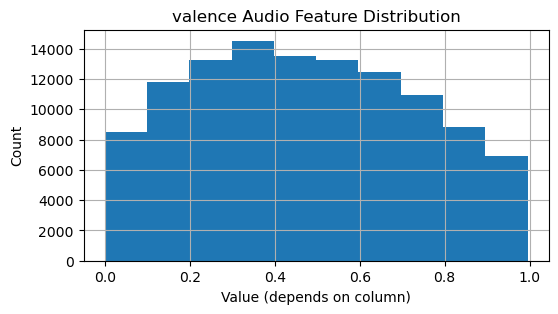

In [7]:
# Run in-place to see all of them (Ctrl-Enter)
choice = relevant[cur]
cur = (cur + 1) % len(relevant)
spotidata[choice].hist(figsize=(6, 3))
plt.xlabel('Value (depends on column)')
plt.ylabel('Count')
plt.title(f'{choice} Audio Feature Distribution')

In [17]:
outjsx = open('mood_generator.jsx', 'w+')

In [18]:
# Ok time to actually get all the ranges
outjsx.write("tertiles =  {\n")
for feature in relevant:
    tertiles = list(spotidata[feature].quantile([1/3, 2/3]).values)
    outjsx.write(f"  '{feature}': {tertiles}, \n")
outjsx.write("}\n")

2

In [19]:
outjsx.close()